In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
class SGD(object):
    
    def __init__(self, eta=0.0001, n_iter=200, initial_w=False):
        self.eta=eta
        self.n_iter=n_iter
        self.initial_w=initial_w
        
    def fit(self, X, y):
        if not self.initial_w:
            self.initialize_w(X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
            #shuffle the order of the samples to avoid close circle
            X_r, y_r=self.shuffle(X,y)
            cost=0
            
            for x, target in zip(X_r,y_r):
                #update w for every sample
                cost+=self.update_w(x,target)
            self.cost_.append(cost/len(y))
        return self
    
    def update_w(self, x, target):
        output=self.net_input(x)
        error=(target-output)
        self.w[1:]+=self.eta*x.dot(error)
        self.w[0]+=self.eta*error
        cost=0.5*error*error
        return cost
    
    def initialize_w(self, n_features):
        self.w=np.zeros((n_features+1))
        self.initial_w=True
        
    def net_input(self,X):
        return X.dot(self.w[1:])+self.w[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def prediction(self, X):
        return np.where(self.activation(X)>0.0, 1, -1)
    
    def shuffle(self, X, y):
        r=np.random.permutation(len(y))
        return X[r], y[r]
        

In [117]:
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                header=None)
X=data.iloc[0:100, [0,2]].values
X[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
X[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()
y=data.iloc[0:100, 4].values
y=np.where(y=='Iris-setosa',1,-1)

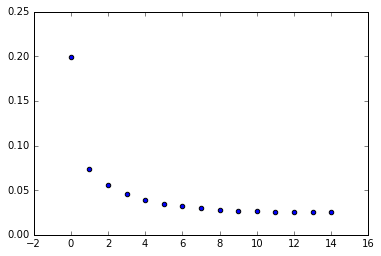

In [119]:
model= SGD(eta=0.01, n_iter=15)
model.fit(X,y)
pre=model.prediction(X)
plt.scatter(range(15), model.cost_)

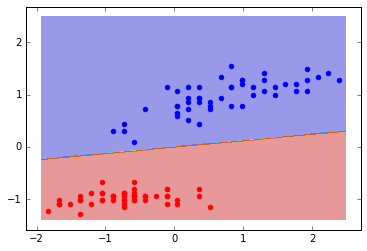

In [120]:
x1_min, x1_max = X[:,0].min()-0.1, X[:,0].max()+0.1
x2_min, x2_max = X[:,1].min()-0.1, X[:,0].max()+0.1
resolution=0.01
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
z=model.prediction(np.array([xx1.ravel(),xx2.ravel()]).T)
z=z.reshape(xx1.shape)
plt.contourf(xx1,xx2,z, alpha=0.4)

plt.scatter(X[y==1,0], X[y==1,1],color='r')
plt.scatter(X[y==-1,0], X[y==-1,1], color='b')